In [11]:
import pandas as pd
df = pd.read_csv('./data/PEMS07/PEMS07.csv')

print(df.head())


   from   to   cost
0   721  445  0.790
1   542  480  2.575
2   770  702  0.926
3    32  266  0.596
4    34   56  0.628


In [12]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.02, random_state=42)
iso_forest.fit(df[['cost']])

df['Anomaly'] = iso_forest.predict(df[['cost']])
df['Anomaly'] = df['Anomaly'].map({1: 0, -1: 1}) 

print(df)


     from   to   cost  Anomaly
0     721  445  0.790        0
1     542  480  2.575        0
2     770  702  0.926        0
3      32  266  0.596        0
4      34   56  0.628        0
..    ...  ...    ...      ...
861   591  600  8.862        1
862   374   40  1.471        0
863   477  498  1.596        0
864   710  843  0.785        0
865   396  352  6.296        0

[866 rows x 4 columns]


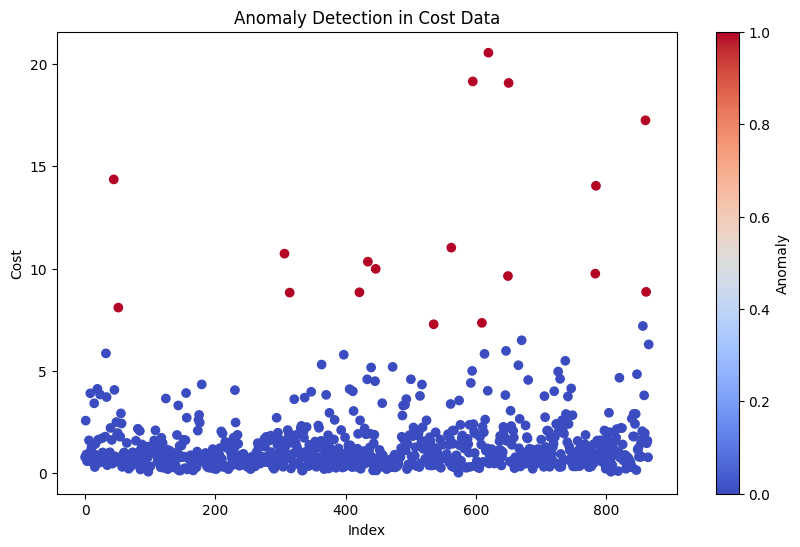

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['cost'], c=df['Anomaly'], cmap='coolwarm', marker='o')
plt.xlabel('Index')
plt.ylabel('Cost')
plt.title('Anomaly Detection in Cost Data')
plt.colorbar(label='Anomaly')
plt.show()


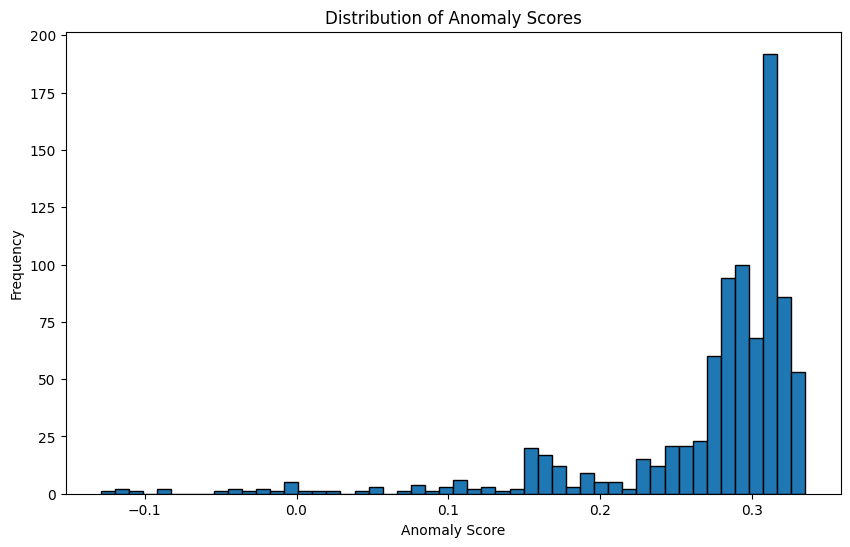

In [14]:

df['Anomaly_Score'] = iso_forest.decision_function(df[['cost']])


plt.figure(figsize=(10, 6))
plt.hist(df['Anomaly_Score'], bins=50, edgecolor='k')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.show()


In [15]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df[['cost']], df['Anomaly'])
print(f'Silhouette Score: {silhouette_avg:.3f}')


Silhouette Score: 0.888


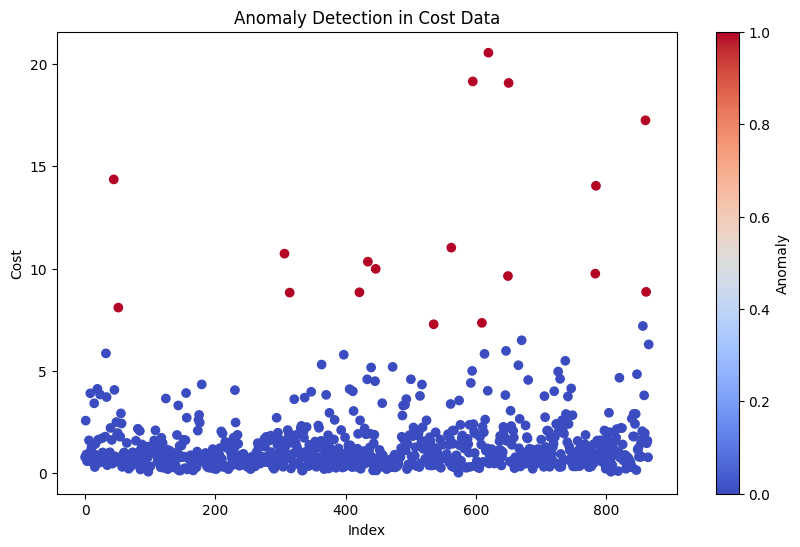

In [16]:

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['cost'], c=df['Anomaly'], cmap='coolwarm', marker='o')
plt.xlabel('Index')
plt.ylabel('Cost')
plt.title('Anomaly Detection in Cost Data')
plt.colorbar(label='Anomaly')
plt.show()


In [17]:
import seaborn as sns


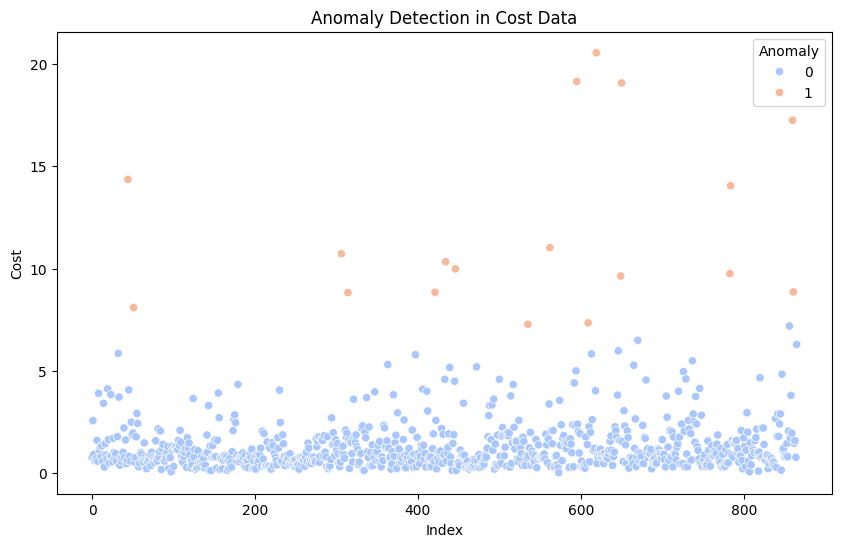

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='cost', hue='Anomaly', palette='coolwarm', marker='o')
plt.xlabel('Index')
plt.ylabel('Cost')
plt.title('Anomaly Detection in Cost Data')
plt.show()

In [19]:
print("Anomalous data:")
anomalies = df[df['Anomaly'] == 1]
print(anomalies[['from', 'to', 'cost']])
df['cost'].describe()

Anomalous data:
     from   to    cost
44    585   36  14.353
51    223  499   8.095
306    18  833  10.729
314   525  438   8.827
421   192   52   8.842
434   344  494  10.337
446   767   49   9.985
535   235  654   7.281
562   154  192  11.022
595   684  296  19.138
609   518   98   7.349
619   264  396  20.539
649    10  340   9.636
650   340  696  19.063
783   647  154   9.751
784   330   39  14.042
860   663  789  17.238
861   591  600   8.862


count    866.000000
mean       1.462465
std        1.948768
min        0.032000
25%        0.590000
50%        0.917000
75%        1.612000
max       20.539000
Name: cost, dtype: float64

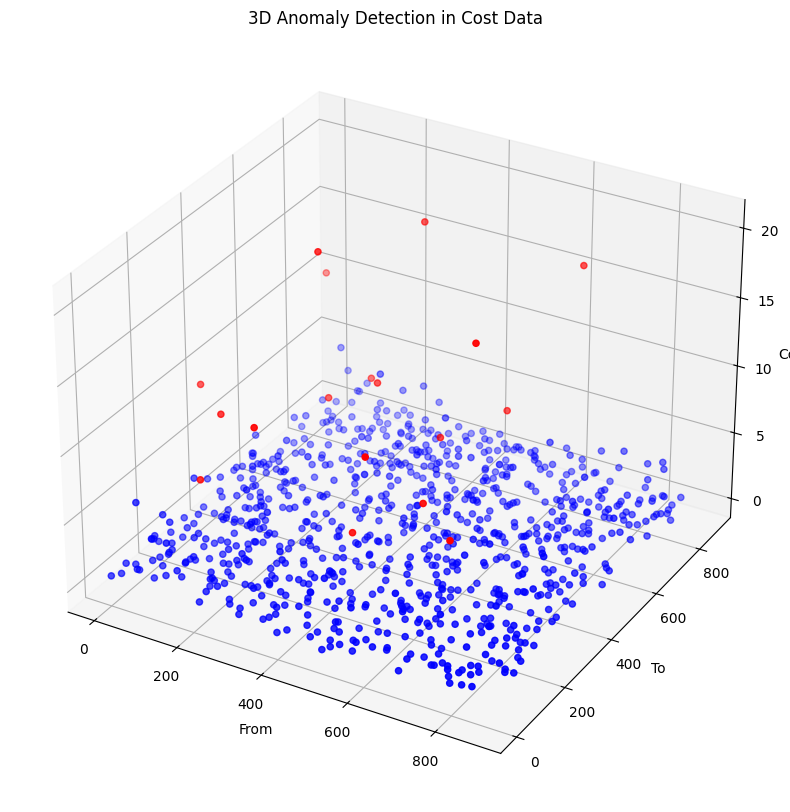

In [22]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
colors = df['Anomaly'].apply(lambda x: 'red' if x == 1 else 'blue')
sc = ax.scatter(df['from'], df['to'], df['cost'], c=colors, marker='o')

ax.set_xlabel('From')
ax.set_ylabel('To')
ax.set_zlabel('Cost')
ax.set_title('3D Anomaly Detection in Cost Data')

plt.show()
